In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from fuzzywuzzy import fuzz

sns.set_style("whitegrid")

In [1]:
#Load the data
import pickle
#with open("../data/deduped_policy_text_v11no_html_with_links_and_emails.pickle", "rb") as f:
with open("../data/df_updates.pickle", "rb") as f:
    df = pickle.load(f)

In [2]:
list(df)

['site_url',
 'year',
 'season',
 'policy_text',
 'policy_snapshot_url',
 'policy_filetype',
 'raw_source_path',
 'link_text',
 'homepage_snapshot_url',
 'homepage_snapshot_redirected_url',
 'sha1',
 'flesch_kincaid',
 'smog',
 'flesch_ease',
 'policy_title',
 'text_len',
 'word_count',
 'year_season',
 'simhash',
 'policy_url',
 'home_domain',
 'ip_based_homepage_url',
 'categories',
 'policy_snapshot_domain',
 'strict_updated',
 'simhash_updated',
 'homepage_snapshot_domain',
 'homepage_snapshot_redirected_domain',
 'parked_domain',
 'classifier_probability',
 'alexa_rank',
 'cross_domain_homepage_redir',
 'redirected_to_similar_domain',
 'cross_domain_policy',
 'emails',
 'has_email',
 'links',
 'has_external_link',
 'binned_rank',
 'gap_before',
 'policy_text_normalized',
 'fuzzy_updated',
 'diff_result',
 'increased',
 'decreased',
 'inline_update',
 'common']

In [3]:
df.fuzzy_updated

237698     False
1043500    False
892937     False
1118180    False
337273      True
           ...  
1221991    False
340360     False
892528     False
79317      False
547901     False
Name: fuzzy_updated, Length: 910546, dtype: bool

In [14]:
df.increased

237698    0.0
170420    0.0
803306    0.0
378779    0.0
240948    0.0
         ... 
23020     0.0
265549    0.0
827215    0.0
799670    0.0
261124    0.0
Name: increased, Length: 910546, dtype: float64

In [15]:
df.decreased

237698    0.0
170420    0.0
803306    0.0
378779    0.0
240948    0.0
         ... 
23020     0.0
265549    0.0
827215    0.0
799670    0.0
261124    0.0
Name: decreased, Length: 910546, dtype: float64

In [13]:
df[df.inline_update > 0]

,site_url,year,season,policy_text,policy_snapshot_url,policy_filetype,raw_source_path,link_text,homepage_snapshot_url,homepage_snapshot_redirected_url,...,has_external_link,binned_rank,gap_before,policy_text_normalized,fuzzy_updated,diff_result,increased,decreased,inline_update,common
124903,http://ssa.gov,1998,A,| \n\nThe privacy of our customers has always ...,https://web.archive.org/web/19980529151027id_/...,html,crawl5/data-01/out/policy_html/14496_1998_A_19...,privacy policy,https://web.archive.org/web/19980212101730id_/...,https://web.archive.org/web/19980212101730id_/...,...,False,> 1M,0.0,| \n\nThe privacy of our customers has always ...,False,"{' ': 13, '- ': 1, '? ': 2, '+ ': 1, 'previou...",7.142857,7.142857,14.285714,92.857143
231827,http://movies.com,1998,B,\nBUENA VISTA ONLINE PRIVACY POLICY\n\nThe p...,https://web.archive.org/web/19981207020007id_/...,html,crawl4/data-04/out/policy_html/789_1998_B_1998...,Please click here for movies.com's Internet pr...,https://web.archive.org/web/19981111190618id_/...,https://web.archive.org/web/19981111190618id_/...,...,True,> 1M,0.0,\nBUENA VISTA ONLINE PRIVACY POLICY\n\nThe p...,True,"{' ': 26, '- ': 7, '? ': 12, '+ ': 14, 'previ...",42.424242,21.212121,36.363636,78.787879
134092,http://woodmagazine.com,1998,B,> Meredith Corporation \n> Online Privacy S...,https://web.archive.org/web/19980715034842id_/...,html,crawl4/data-16/out/policy_html/1176_1998_B_199...,Web Privacy Policy,https://web.archive.org/web/19981202120428id_/...,https://web.archive.org/web/19981202120428id_/...,...,True,> 1M,0.0,> Meredith Corporation \n> Online Privacy S...,False,"{' ': 28, '- ': 2, '? ': 4, '+ ': 2, 'previou...",6.666667,6.666667,13.333333,93.333333
232374,http://mtv.com,1998,B,MTV ONLINE'S PRIVACY POLICY\n\nRevised: Octobe...,https://web.archive.org/web/19981206221753id_/...,html,crawl4/data-04/out/policy_html/922_1998_B_1998...,MTV Online's Privacy Policy,https://web.archive.org/web/19981205084650id_/...,https://web.archive.org/web/19981205084650id_/...,...,False,> 1M,0.0,MTV ONLINE'S PRIVACY POLICY\n\nRevised: Octobe...,True,"{'- ': 7, '? ': 2, '+ ': 9, ' ': 6, 'previous...",69.230769,53.846154,15.384615,46.153846
1253950,http://aarp.org,1998,B,AARP Webplace \nPrivacy Policy Statement\n\nA...,https://web.archive.org/web/19980713034224id_/...,html,crawl1/data-02/out/policy_html/633_1998_B_1998...,AARP Webplace Privacy Policy,https://web.archive.org/web/19981212022430id_/...,https://web.archive.org/web/19981212022430id_/...,...,False,> 1M,0.0,AARP Webplace \nPrivacy Policy Statement\n\nA...,False,"{' ': 23, '- ': 2, '+ ': 2, '? ': 3, 'previou...",8.000000,8.000000,12.000000,92.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265350,http://tricksgang.com,2019,B,"Last updated: July 07, 2017\n\nTricksGang (“us...",https://web.archive.org/web/20191210160644id_/...,html,crawl3/data-08/out/policy_html/3731_2019_B_201...,Privacy Policy,https://web.archive.org/web/20191118035231id_/...,https://web.archive.org/web/20191118035231id_/...,...,True,"(10K, 100K]",0.0,"Last updated: July 07, 2017\n\nTricksGang (“us...",False,"{' ': 55, '- ': 2, '? ': 3, '+ ': 2, 'previou...",3.508772,3.508772,5.263158,96.491228
265288,http://totallifechanges.com,2019,B,The Internet is an amazing tool. It has the po...,https://web.archive.org/web/20191028212537id_/...,html,crawl3/data-08/out/policy_html/2545_2019_B_201...,Privacy Policy,https://web.archive.org/web/20191022103544id_/...,https://web.archive.org/web/20191022103544id_/...,...,True,"(100K, 1M]",0.0,The Internet is an amazing tool. It has the po...,True,"{'- ': 33, ' ': 53, '? ': 18, '+ ': 24, 'prev...",27.906977,38.372093,20.930233,61.627907
519451,http://unt.edu,2019,B,### Privacy Statement\n\nThis Web site (http:/...,https://web.archive.org/web/20191214063934id_/...,html,crawl1/data-29/out/policy_html/15436_2019_B_20...,Privacy,https://web.archive.org/web/20190929173432id_/...,https://web.archive.org/web/20190929

<AxesSubplot:xlabel='year_season', ylabel='fuzzy_updated'>

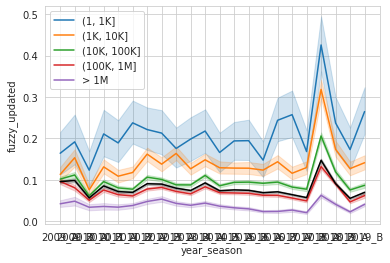

In [12]:
df = df.sort_values("year_season")
sns.lineplot(data=df[df.year >= 2009],x="year_season",y="fuzzy_updated",hue="binned_rank")
sns.lineplot(data=df[df.year >= 2009],x="year_season",y="fuzzy_updated",color="black")

# GDPR phrases

In [27]:
from tqdm.auto import tqdm
tqdm.pandas()

/n/fs/policyphylog/PrivacyPolicyPlagiarism/.venv/lib/python3.7/site-packages/tqdm/std.py:670: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [17]:
import nltk
import nltk.stem

In [18]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [43]:
gdpr_phrases = []
with open("data/GDPR_phrases.txt") as f:
    for line in f.readlines():
        gdpr_phrases.append(" ".join(map(lemmatizer.lemmatize,line.strip().split(" "))))

In [29]:
def lemmatize_policy(policy_text):
    return " ".join(map(lemmatizer.lemmatize,nltk.word_tokenize(policy_text.lower())))

In [30]:
df["policy_text_lemmatized"] = df.policy_text.progress_map(lemmatize_policy)

In [44]:
for phrase in gdpr_phrases:
    df[f"phrase_{phrase.replace(' ','_')}"] = df.policy_text_lemmatized.progress_apply(lambda x: phrase in x)

In [39]:
(df.increased - df.decreased).sort_values()

169973       -99.519231
736049       -99.441341
667304       -99.411765
736035       -99.401198
90746        -99.290780
               ...     
1102591    22500.000000
904664     26500.000000
612187     27800.000000
468395     42600.000000
1189880    42600.000000
Length: 910546, dtype: float64

In [40]:
df["new_lines"] = (df.increased - df.decreased).apply(lambda x: max(x,0))

In [62]:
df[df.year_season == "2018_A"].new_lines.describe()

count    26410.000000
mean        22.973325
std        265.639825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      26500.000000
Name: new_lines, dtype: float64

In [42]:
df["new_lines"].sort_values()

237698         0.0
1018071        0.0
842368         0.0
1141108        0.0
1064157        0.0
            ...   
1102591    22500.0
904664     26500.0
612187     27800.0
1189880    42600.0
468395     42600.0
Name: new_lines, Length: 910546, dtype: float64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='phrase_gdpr', ylabel='Count'>

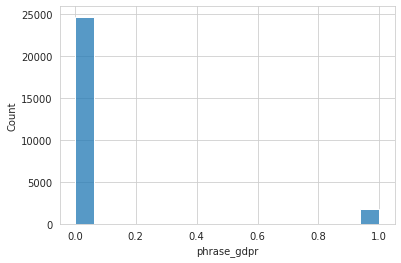

In [53]:
sns.histplot(x="phrase_gdpr",data=df[df.year_season == "2018_A"])

In [60]:
np.quantile(df[df.year_season == "2018_A"].new_lines, [0.2,0.8])

array([0., 0.])

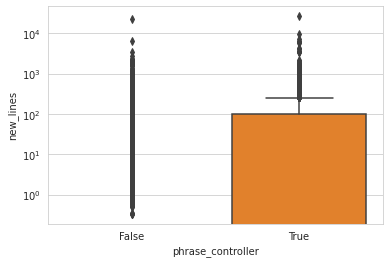

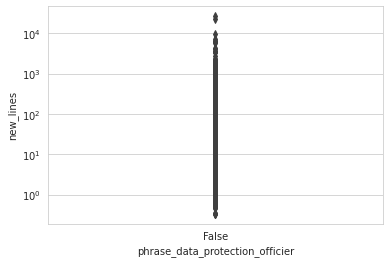

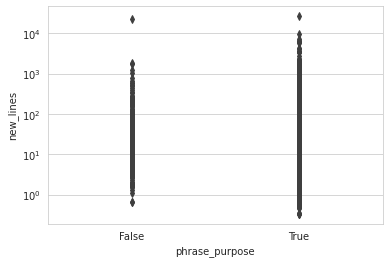

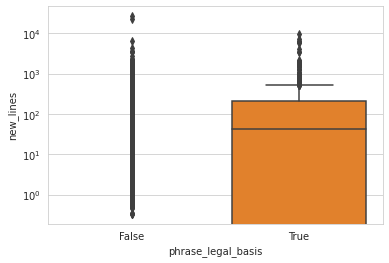

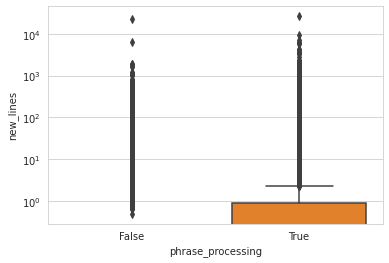

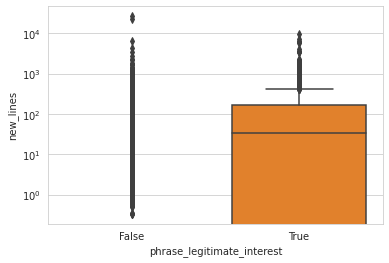

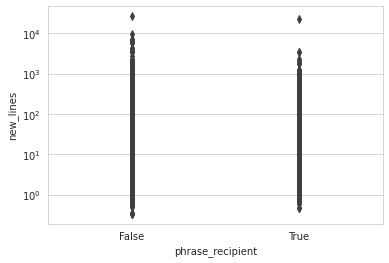

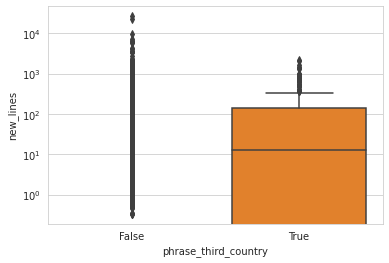

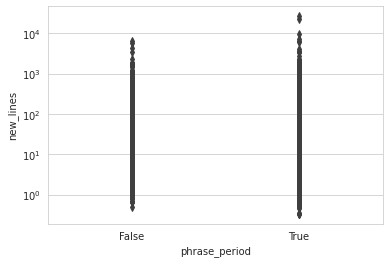

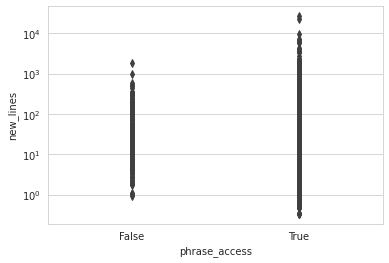

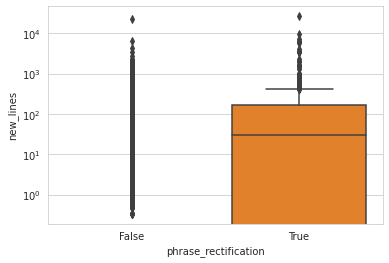

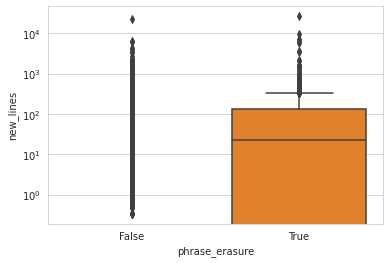

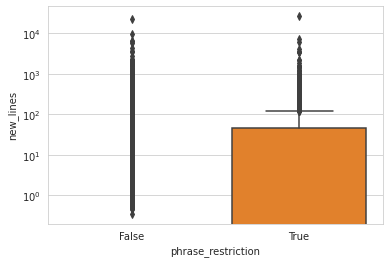

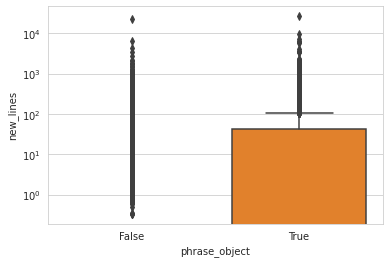

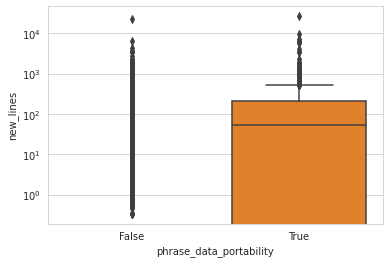

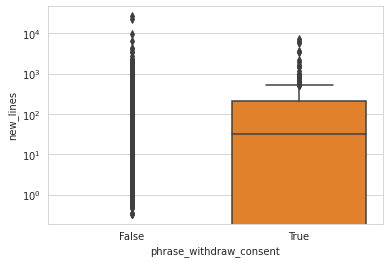

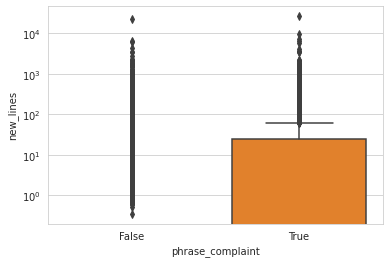

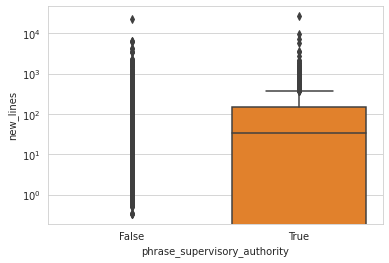

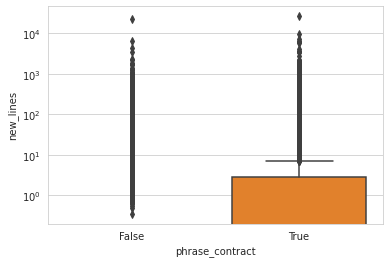

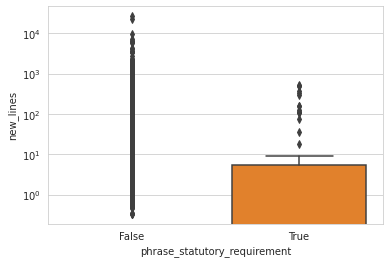

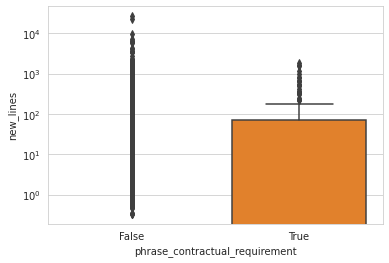

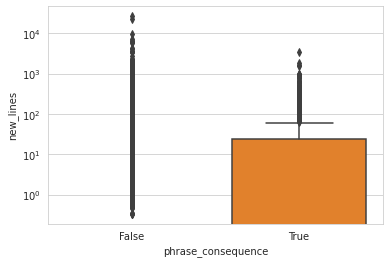

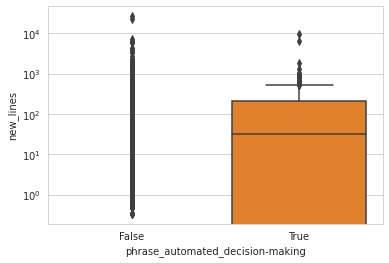

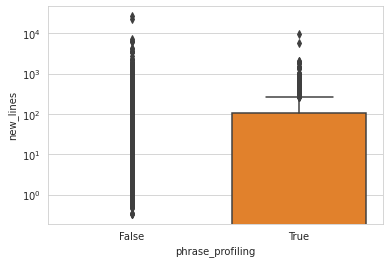

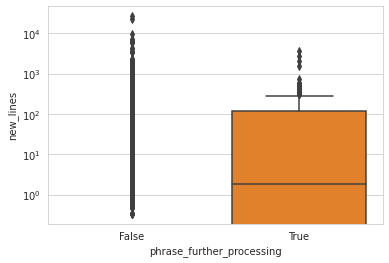

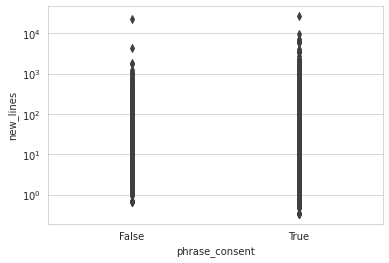

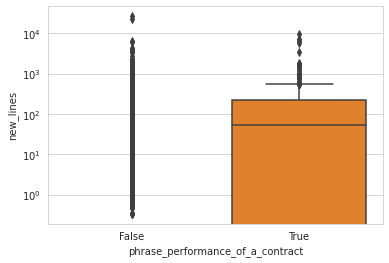

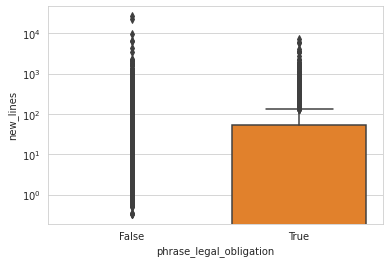

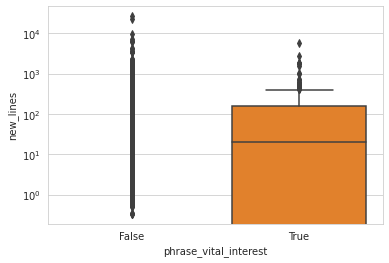

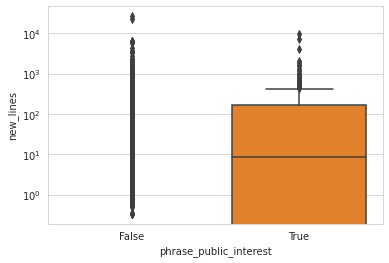

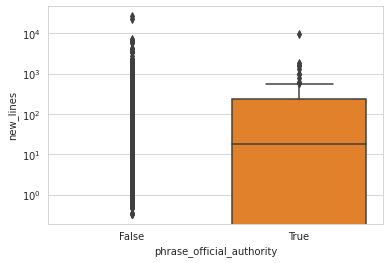

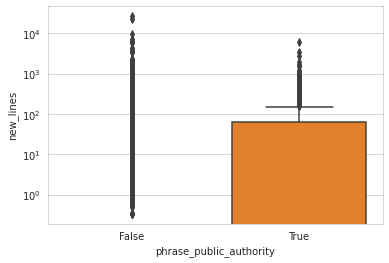

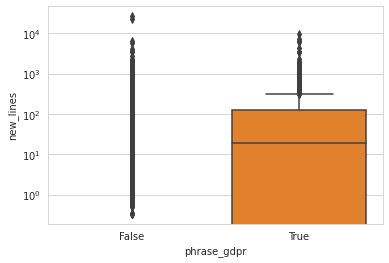

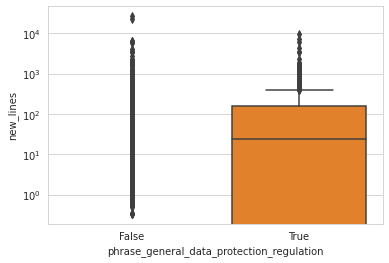

In [58]:
for phrase in gdpr_phrases:
    ax = sns.boxplot(y="new_lines",x=f"phrase_{phrase.replace(' ','_')}",data=df[df.year_season == "2018_A"])
    ax.set_yscale("log")
    plt.show()


In [64]:
good_phrases = ['automated decision-making',
 'contractual requirement',
 'data portability',
 'data protection officier',
 'erasure',
 'further processing',
 'gdpr',
 'general data protection regulation',
 'legal basis',
 'legitimate interest',
 'official authority',
 'performance of a contract',
 'public authority',
 'public interest',
 'rectification',
 'statutory requirement',
 'supervisory authority',
 'third country',
 'vital interest',
 'withdraw consent']

In [65]:
good_phrase_cols = list(map(lambda phrase: f"phrase_{phrase.replace(' ','_')}", good_phrases))

In [69]:
df["gdpr_phrases"] = df[good_phrase_cols].any(axis=1)

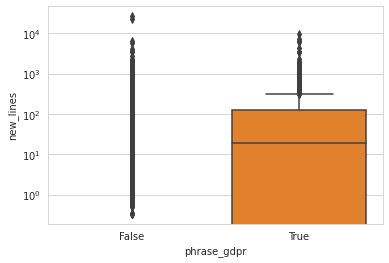

In [73]:
ax = sns.boxplot(y="new_lines",x=f"phrase_gdpr",data=df[df.year_season == "2018_A"])
ax.set_yscale("log")

In [75]:
for gid, gdf in df[df.year_season == "2018_A"].groupby("phrase_gdpr"):
    print(gdf.new_lines.describe())

count    24690.000000
mean        15.094238
std        245.684769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      26500.000000
Name: new_lines, dtype: float64
count    1720.000000
mean      136.074872
std       451.067199
min         0.000000
25%         0.000000
50%        19.672131
75%       128.923589
max      9533.333333
Name: new_lines, dtype: float64


In [86]:
df[(df.year_season == "2018_A") & (df.phrase_gdpr)].diff_result.iloc[0]

{'- ': 20,
 '+ ': 38,
 '  ': 33,
 '? ': 5,
 'previous_policy_n_lines': 53,
 'policy_n_lines': 71,
 'full_diff': ['- Thank you for your interest in Mercy For Animals. Your privacy is important to us. Please read below for details regarding our use of the information you provide to us.',
  '+ Thank you for your interest in Mercy For Animals. Your privacy is important to us. Please read below for details regarding how we utilize the information you provide to us. For users accessing this website from the European Union, this Privacy Policy also provides instructions on how to request the removal of your data or a readout of your data as required under the General Data Protection Regulation (“GDPR”).',
  '  ',
  '  Please also note that this policy applies only to websites and publications maintained by MFA and not to external sites or affiliated organizations and companies. Refer to the privacy policies of the respective organizations and companies for more information.',
  '  ',
  '- ###

In [90]:
for rowid, row in df[(df.year_season == "2018_A") & (df.phrase_gdpr)].sample(25).iterrows():
    if row.diff_result:
        print("\n".join(row.diff_result["full_diff"]))
    else:
        print("No diff")
        print(row.policy_text)
    print("------------------------------NEXT POLICY------------------------------------")

No diff
Click the drop down arrow () to select your language.

CLICK HERE TO PRINT THE BNI® PRIVACY POLICY IN ENGLISH.

|  TRANSLATIONS  
---  
|  Deutsch |  |  プライバシー規定 |  | Polska  
  
Effective/Last Updated: May 25, 2018

BNI®  
PRIVACY POLICY

BNI Worldwide Development Ltd controls data related to BNI’s operating management system known as BNI Connect® for and on behalf of BNI Global, LLC, together with its related affiliates BNI Singapore Enterprises Pvt Ltd, BNI India Enterprises Pvt Ltd, BNI Franchising, LLC, BNI Connect Global, LLC, BNI Hong Kong Enterprises Pvt Ltd, BNI Lanka Enterprises Pvt Ltd, and BNI Enterprise Business Network (Guangzhou) Co Ltd (“BNI”, “our” or “we”) prioritizes the privacy of our users, and has developed this privacy policy to show our commitment to that and to explain how we use certain information ("Privacy Policy"). This Privacy Policy is intended to explain to you, as a user of BNI or our services, what information we collect, how we use that inform